# Week Four 

## Exploratory Data Analysis (EDA)

In [1]:
%cd '/Users/josezenteno/Intro_to_Python/Code - Weekly Sessions'

/Users/josezenteno/Intro_to_Python/Code - Weekly Sessions


In [2]:
#importing the pandas and numpy libraries as pd
import numpy as np
import pandas as pd

### This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.It's a great dataset for evaluating simple regression models.

In [3]:
# Using the pandas read_csv function to import the data file we will analyze this week
# https://www.kaggle.com/harlfoxem/housesalesprediction
df=pd.read_csv('kc_house_data.csv',parse_dates=True, index_col='id')
df['id']=df.index
print(df.head(2))
print(df.info())

                       date     price  bedrooms  bathrooms  sqft_living  \
id                                                                        
7129300520  20141013T000000  221900.0         3       1.00         1180   
6414100192  20141209T000000  538000.0         3       2.25         2570   

            sqft_lot  floors  waterfront  view  condition  ...  sqft_above  \
id                                                         ...               
7129300520      5650     1.0           0     0          3  ...        1180   
6414100192      7242     2.0           0     0          3  ...        2170   

            sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                             
7129300520              0      1955             0    98178  47.5112 -122.257   
6414100192            400      1951          1991    98125  47.7210 -122.319   

            sqft_living15  sqft_lot15          id  
id           

### Checking to see if the DataFrame has any null values

In [4]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
id               0
dtype: int64

### Drop any columns as needed

In [5]:
df=df.drop(['lat','long'], axis=1)
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'id'],
      dtype='object')

### Drop any rows as needed

In [6]:
df.drop(df[df['floors']>2].index,inplace=True)

In [7]:
print(df['floors'].value_counts())

1.0    10680
2.0     8241
1.5     1910
Name: floors, dtype: int64


In [8]:
df.drop(df[df['bedrooms']>5].index,inplace=True)

In [9]:
print(df['bedrooms'].value_counts())

3    9359
4    6763
2    2630
5    1565
1     195
0      10
Name: bedrooms, dtype: int64


### Cleaning up the date column and converting it to date

In [10]:
df['date']=df['date'].str[:8]
df['date']=pd.to_datetime(df['date'])
print(df.head(2))

                 date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                            
7129300520 2014-10-13  221900.0         3       1.00         1180      5650   
6414100192 2014-12-09  538000.0         3       2.25         2570      7242   

            floors  waterfront  view  condition  grade  sqft_above  \
id                                                                   
7129300520     1.0           0     0          3      7        1180   
6414100192     2.0           0     0          3      7        2170   

            sqft_basement  yr_built  yr_renovated  zipcode  sqft_living15  \
id                                                                          
7129300520              0      1955             0    98178           1340   
6414100192            400      1951          1991    98125           1690   

            sqft_lot15          id  
id                                  
7129300520        5

### Checking DataTypes

In [11]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
sqft_living15             int64
sqft_lot15                int64
id                        int64
dtype: object

In [12]:
df['zipcode']=df['zipcode'].astype('str')
df['id']=df['id'].astype('str')
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
sqft_living15             int64
sqft_lot15                int64
id                       object
dtype: object

### Using the apply function to transform a column we want to explore

In [13]:
def to_meters(column):
    return column*0.3048

In [14]:
df['meters_living']=df['sqft_living'].apply(to_meters)
df['meters_lot']=df['sqft_lot'].apply(to_meters)
df['meters_basement']=df['sqft_basement'].apply(to_meters)
print(df[['meters_living','meters_lot','meters_basement']])

            meters_living  meters_lot  meters_basement
id                                                    
7129300520        359.664   1722.1200            0.000
6414100192        783.336   2207.3616          121.920
5631500400        234.696   3048.0000            0.000
2487200875        597.408   1524.0000          277.368
1954400510        512.064   2462.7840            0.000
...                   ...         ...              ...
2997800021        399.288    394.4112           39.624
6600060120        704.088   1771.8024            0.000
1523300141        310.896    411.4800            0.000
291310100         487.680    727.8624            0.000
1523300157        310.896    327.9648            0.000

[20522 rows x 3 columns]


### The most basic EDA we can do is use the value_counts method on a column to see the count by label

In [15]:
df['yr_built'].value_counts(sort=True, ascending=False)

2014    468
2005    404
1977    402
2003    400
2004    399
       ... 
2015     29
1901     26
1935     24
1902     22
1934     21
Name: yr_built, Length: 116, dtype: int64

In [16]:
df['bedrooms'].value_counts(sort=True, ascending=False)

3    9359
4    6763
2    2630
5    1565
1     195
0      10
Name: bedrooms, dtype: int64

##### This method also has an optional parameter called dropna which is True by default. What this means is if you have missing data in a column, it will not give a frequency count of them. You want to set the dropna column to False so if there are missing values in a column, it will give you the frequency counts.
 

#### The unique method allows you to see the levels within one Series

In [17]:
df['zipcode'].unique()

array(['98178', '98125', '98028', '98136', '98074', '98053', '98003',
       '98198', '98146', '98038', '98007', '98115', '98107', '98126',
       '98019', '98103', '98002', '98133', '98040', '98092', '98030',
       '98119', '98112', '98052', '98027', '98117', '98058', '98001',
       '98056', '98166', '98023', '98070', '98148', '98105', '98042',
       '98008', '98059', '98122', '98144', '98004', '98005', '98034',
       '98075', '98116', '98010', '98118', '98199', '98032', '98045',
       '98102', '98077', '98108', '98168', '98177', '98065', '98029',
       '98006', '98109', '98022', '98033', '98155', '98024', '98011',
       '98031', '98106', '98072', '98188', '98014', '98055', '98039'],
      dtype=object)

## Statistical Exploratory Data Analysis (EDA) and Hypothesis Testing

#### One of the first steps in statistical data analysis is to get summary statistics of each of the numeric columns in the DataFrame

In [18]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,meters_living,meters_lot,meters_basement
count,2.052200e+04,20522.000000,20522.000000,20522.000000,2.052200e+04,20522.000000,20522.000000,20522.000000,20522.000000,20522.000000,20522.000000,20522.000000,20522.000000,20522.000000,20522.000000,20522.000000,20522.000000,20522.000000,20522.000000
mean,5.311863e+05,3.333447,2.082582,2062.513449,1.537122e+04,1.439821,0.007261,0.227025,3.419598,7.627278,1772.367654,290.145795,1970.160072,83.925738,1991.401228,12997.139899,628.654099,4685.149284,88.436438
std,3.515262e+05,0.833056,0.749559,889.627827,4.155516e+04,0.472847,0.084901,0.752278,0.655142,1.171433,813.608611,435.798562,28.986320,400.585378,682.637438,27292.525476,271.158562,12666.013493,132.831402
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000,88.392000,158.496000,0.000000
25%,3.175312e+05,3.000000,1.500000,1420.000000,5.225000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,1490.000000,5251.500000,432.816000,1592.580000,0.000000
50%,4.470000e+05,3.000000,2.250000,1910.000000,7.708000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1551.000000,0.000000,1973.000000,0.000000,1850.000000,7700.000000,582.168000,2349.398400,0.000000
75%,6.351500e+05,4.000000,2.500000,2520.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,560.000000,1994.000000,0.000000,2370.000000,10154.750000,768.096000,3291.840000,170.688000
max,7.062500e+06,5.000000,6.750000,10040.000000,1.651359e+06,2.000000,1.000000,4.000000,5.000000,13.000000,8020.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000,3060.192000,503334.223200,1469.136000


#### The groupby function in pandas is a great way to statistically help you understand more about the data you are working with 

In [19]:
df.groupby('bedrooms')['price'].mean()

bedrooms
0    356055.000000
1    316027.866667
2    396941.615589
3    462481.635538
4    628712.714180
5    774129.383387
Name: price, dtype: float64

In [20]:
df.groupby(['floors','waterfront'])['price'].max()

floors  waterfront
1.0     0             3800000.0
        1             4668000.0
1.5     0             2900000.0
        1             2485000.0
2.0     0             5570000.0
        1             7062500.0
Name: price, dtype: float64

In [21]:
df.groupby(['floors','waterfront'])['price'].agg(['mean','min','max'])

mean       min        max
floors waterfront                                   
1.0    0           4.360581e+05   75000.0  3800000.0
       1           1.258935e+06  285000.0  4668000.0
1.5    0           5.490059e+05   92000.0  2900000.0
       1           1.249742e+06  425000.0  2485000.0
2.0    0           6.315219e+05   90000.0  5570000.0
       1           2.000426e+06  380000.0  7062500.0

### Programmatically pivoting data using Pandas

In [22]:
?df.pivot

Signature: df.pivot(index=None, columns=None, values=None)
Docstring:
Return reshaped DataFrame organized by given index / column values.

Reshape data (produce a "pivot" table) based on column values. Uses
unique values from specified `index` / `columns` to form axes of the
resulting DataFrame. This function does not support data
aggregation, multiple values will result in a MultiIndex in the
columns. See the :ref:`User Guide <reshaping>` for more on reshaping.

Parameters
----------
index : string or object, optional
    Column to use to make new frame's index. If None, uses
    existing index.
columns : string or object
    Column to use to make new frame's columns.
values : string, object or a list of the previous, optional
    Column(s) to use for populating new frame's values. If not
    specified, all remaining columns will be used and the result will
    have hierarchically indexed columns.

    .. versionchanged :: 0.23.0
       Also accept list of column names.

Returns
-----

year_built_pivot = df.pivot_table(index='yr_built',columns='waterfront', values='id',aggfunc='count')
print(year_built_pivot)

In [23]:
bedrooms_floors_pivot = df.pivot_table(index='bedrooms',columns='floors', values='price',aggfunc='max')
print(bedrooms_floors_pivot)

floors          1.0        1.5        2.0
bedrooms                                 
0          265000.0        NaN  1295650.0
1          655100.0  1247000.0   680000.0
2         1550000.0  1370000.0  1998000.0
3         3300000.0  2400000.0  3800000.0
4         3395000.0  2900000.0  4489000.0
5         4668000.0  2408000.0  7062500.0


#### Computing the correlation coefficient between two numeric variables

In [24]:
from scipy.stats import pearsonr
pearsonr(df['sqft_living'],df['bedrooms'])

(0.5877225342901817, 0.0)

#### Percentiles, are a good option to help you statistically explore different features in our DataFrames

In [25]:
import numpy as np
percentiles = [2.5,25,50,75,97.5]
np.percentile(df['price'],percentiles)

array([ 182571.3 ,  317531.25,  447000.  ,  635150.  , 1438817.75])

### One other library that is essential for data analysis is the numpy library

#### Numpy has many functions available for statistical and hypothesis testing

In [26]:
import numpy as np

In [27]:
%cd /Users/josezenteno/Intro_to_Python/nyse
import pandas as pd
prices15=pd.read_csv('prices15.csv', parse_dates=True, index_col='date')
prices15['date']=prices15.index
from pandas.plotting import register_matplotlib_converters
google = prices15[prices15['symbol']=='GOOGL']

/Users/josezenteno/Intro_to_Python/nyse


#### Standard Deviation of a Series

In [28]:
np.std(google['volume'])

1129964.0455620873

### The stats module in the scipy package contains a lot of functions that are essential for hypothesis testing and statistical analysis

In [29]:
from scipy import stats

In [30]:
print(dir(stats))

['PearsonRConstantInputWarning', 'PearsonRNearConstantInputWarning', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_binned_statistic', '_constants', '_continuous_distns', '_discrete_distns', '_distn_infrastructure', '_distr_params', '_hypotests', '_multivariate', '_rvs_sampling', '_stats', '_stats_mstats_common', '_tukeylambda_stats', 'absolute_import', 'alpha', 'anderson', 'anderson_ksamp', 'anglit', 'ansari', 'arcsine', 'argus', 'bartlett', 'bayes_mvs', 'bernoulli', 'beta', 'betaprime', 'binned_statistic', 'binned_statistic_2d', 'binned_statistic_dd', 'binom', 'binom_test', 'boltzmann', 'boxcox', 'boxcox_llf', 'boxcox_normmax', 'boxcox_normplot', 'bradford', 'brunnermunzel', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'chi2_contingency', 'chisquare', 'circmean', 'circstd', 'circvar', 'combine_pvalues', 'contingency', 'cosine', 'crystalball', 'cumfreq', 'describe', 'dgamma', 'dirichlet', 'distributions'

#### Calculate the T-test for the means of *two independent* samples of scores

In [31]:
stats.ttest_ind?

Signature: stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
Docstring:
Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values. This test assumes that the
populations have identical variances by default.

Parameters
----------
a, b : array_like
    The arrays must have the same shape, except in the dimension
    corresponding to `axis` (the first, by default).
axis : int or None, optional
    Axis along which to compute test. If None, compute over the whole
    arrays, `a`, and `b`.
equal_var : bool, optional
    If True (default), perform a standard independent 2 sample test
    that assumes equal population variances [1]_.
    If False, perform Welch's t-test, which does not assume equal
    population variance [2]_.

    .. versionadded:: 0.11.0
nan_policy : {'propagate', 'raise', 'omit'}, optional
    Defines how to handle whe

In [32]:
firsthalf = google[google['date'] <= '2015-05-31']
secondhalf = google[google['date'] > '2015-05-31']

In [33]:
stats.ttest_ind(firsthalf['volume'], secondhalf['volume'])

Ttest_indResult(statistic=-0.9870936878399965, pvalue=0.3245510761835184)

#### Using Zscores to identify outliers in our data

In [34]:
?stats.zscore

Signature: stats.zscore(a, axis=0, ddof=0)
Docstring:
Calculate the z score of each value in the sample, relative to the
sample mean and standard deviation.

Parameters
----------
a : array_like
    An array like object containing the sample data.
axis : int or None, optional
    Axis along which to operate. Default is 0. If None, compute over
    the whole array `a`.
ddof : int, optional
    Degrees of freedom correction in the calculation of the
    standard deviation. Default is 0.

Returns
-------
zscore : array_like
    The z-scores, standardized by mean and standard deviation of
    input array `a`.

Notes
-----
This function preserves ndarray subclasses, and works also with
matrices and masked arrays (it uses `asanyarray` instead of
`asarray` for parameters).

Examples
--------
>>> a = np.array([ 0.7972,  0.0767,  0.4383,  0.7866,  0.8091,
...                0.1954,  0.6307,  0.6599,  0.1065,  0.0508])
>>> from scipy import stats
>>> stats.zscore(a)
array([ 1.1273, -1.247 , -0.0

In [35]:
stats.zscore(df['price'],axis=0) > 2.576

array([False, False, False, ..., False, False, False])

In [36]:
stats.zscore(df['price'],axis=0) < -2.576

array([False, False, False, ..., False, False, False])

In [37]:
outliers_upper_limit=df[stats.zscore(df['price'],axis=0) > 2.576]
len(outliers_upper_limit)

514

In [38]:
outliers_lower_limit=df[stats.zscore(df['price'],axis=0) < -2.576]
len(outliers_lower_limit)

0

In [39]:
outliers = outliers_upper_limit.append(outliers_lower_limit)

In [40]:
import matplotlib.pyplot as plt
plt.hist(outliers['price'])
plt.title('Price Outliers')
plt.ylabel('Number of Records')
plt.xlabel('Price in $')

Text(0.5, 0, 'Price in $')

## Visual Exploratory Data Analysis (EDA)

#### Visual Exploratory Analysis is a great way to spot outliers, understand variable distributions, and identify patters in the data

In [41]:
# importing the matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt

### Histograms
#### Important to get an understanding of the distribution of a Series

Text(0.5, 1.0, 'Histogram Plot')

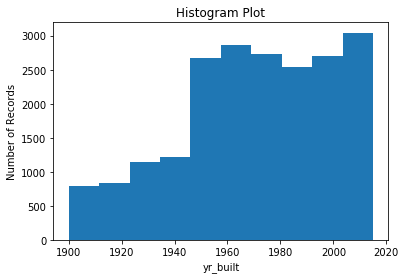

In [42]:
plt.hist(df['yr_built'],bins=10)
plt.xlabel('yr_built')
plt.ylabel('Number of Records')
plt.title('Histogram Plot')

Text(0.5, 1.0, 'Histogram Plot')

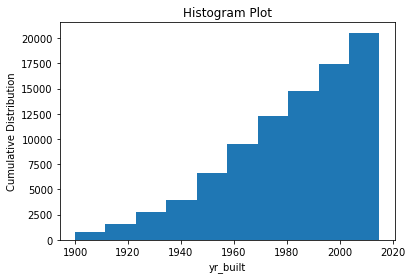

In [43]:
plt.hist(df['yr_built'],bins=10, cumulative=True,label=True)
plt.xlabel('yr_built')
plt.ylabel('Cumulative Distribution')
plt.title('Histogram Plot')

### Scatter Plots
#### Important to get an understanding the relationship between two variables and spot potentially bad data and spot outliers

Text(0.5, 1.0, 'Scatter Plot')

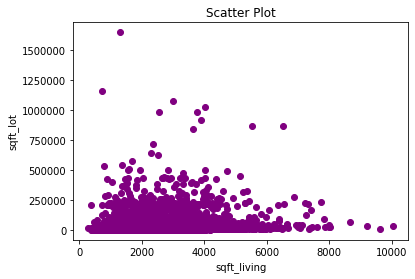

In [44]:
plt.scatter(df['sqft_living'],df['sqft_lot'], color='purple')
plt.xlabel('sqft_living')
plt.ylabel('sqft_lot')
plt.title('Scatter Plot')

### Using plt.subplot() function
####  This function allows you to determine the layout automatically. In subplot (nrows, ncols, the plot you want to set active)

Text(0.5, 1.0, 'Histogram Plot')

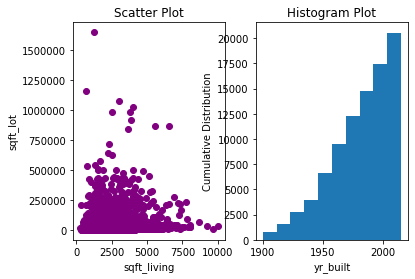

In [45]:
plt.subplot(1,2,1)
plt.scatter(df['sqft_living'],df['sqft_lot'], color='purple')
plt.xlabel('sqft_living')
plt.ylabel('sqft_lot')
plt.title('Scatter Plot')
plt.subplot(1,2,2)
plt.hist(df['yr_built'],bins=10, cumulative=True,label=True)
plt.xlabel('yr_built')
plt.ylabel('Cumulative Distribution')
plt.title('Histogram Plot')

### Visualizing Bivariate and Univariate Distributions
#### Seaborn is a library for statistical visualization and it works best with Pandas

In [46]:
#importing seaborn
import seaborn as sb

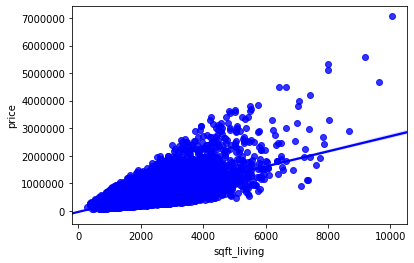

In [47]:
sb.regplot(x='sqft_living', y='price', data=df, scatter=True, color='blue')

#### Strip Plots allow you to plot all the individual records of price grouped by the number of bedrooms

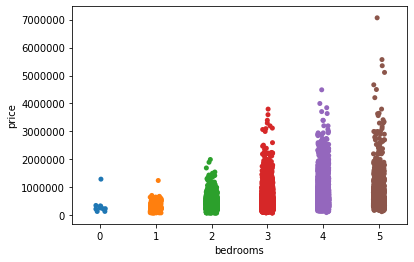

In [48]:
sb.stripplot(x='bedrooms', y='price', data=df)

#### The challenge with the striplot above is that all the values are centered around each other and on top of each other. For that reason, striplot is useful to see outliers but not the distribution of individual groups. 
#### A violinplot helps you get over that challenge as shown below

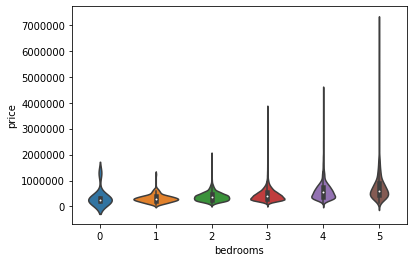

In [49]:
sb.violinplot(x='bedrooms', y='price', data=df)

#### A joint plot is a powerful visualization that allows you to visualize the relationship between two variables, and even get the correlation coefficient of the relationship by importing the pearsonr function from the stats module in the scypy library

/Users/josezenteno/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


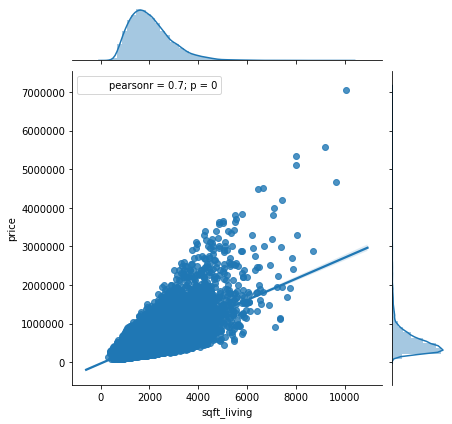

In [50]:
from scipy.stats import pearsonr
sb.jointplot(x='sqft_living', y='price', data=df, stat_func=pearsonr, kind='reg')

#### A heatmap provides a good option to analyze the correlation matrix across multiple variables in your DataFrame

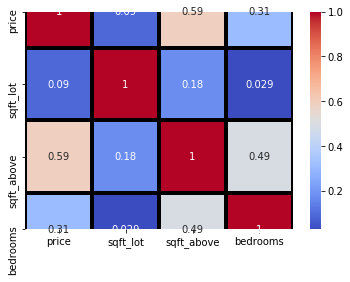

In [51]:
sb.heatmap(df[['price','sqft_lot','sqft_above','bedrooms']].corr(),cmap= 'coolwarm',annot = True,linewidths=3, linecolor='black')

## Visualizing Time Series Data

#### If you want to visualize a time-series, you can use the plt.plot function. It would help if you have the date of your dataframe containing time-series data as the index.

/Users/josezenteno/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'High Price')

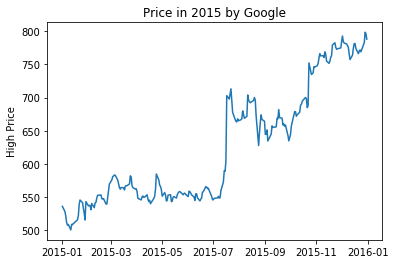

In [52]:
from pandas.plotting import register_matplotlib_converters
google = prices15[prices15['symbol']=='GOOGL']
plt.plot(google['high'])
plt.title('Price in 2015 by Google')
plt.ylabel('High Price')

# Supervised Learning with Scikit-Learn

## Classifiers and Regressors

#### Two of the most common classes of machine learning models are supervised and unsupervised ML models. The key difference is that with supervised models, we have labels which means that we have the correct answers to whatever it is that we want to learn to predict. In unsupervised learning, the data does not have labels.

#### Scikit-learn uses numpy arrays as a data format to train models. Both, the features and label have to be provided to the regressor or classifier algorithm as numpy arrays

#### Importing numpy and KNeighborsClassifier from sklearn.neighbors

In [53]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 

In [54]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,id,meters_living,meters_lot,meters_basement
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,1340,5650,7129300520,359.664,1722.1200,0.00
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,1690,7639,6414100192,783.336,2207.3616,121.92


In [55]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'id', 'meters_living', 'meters_lot', 'meters_basement'],
      dtype='object')

In [56]:
# Create arrays for the features and the response variable
y = df['waterfront'].values
X = df[['bedrooms','bathrooms','sqft_living','floors','sqft_basement']].values

In [57]:
# Numpy arrays are essentially lists, which is why it was important to learn those structures in the first few weeks of class
print(y[:50])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [58]:
# Numpy arrays are essentially lists, which is why it was important to learn those structures in the first few weeks of class
print(X[:5])

[[3.00e+00 1.00e+00 1.18e+03 1.00e+00 0.00e+00]
 [3.00e+00 2.25e+00 2.57e+03 2.00e+00 4.00e+02]
 [2.00e+00 1.00e+00 7.70e+02 1.00e+00 0.00e+00]
 [4.00e+00 3.00e+00 1.96e+03 1.00e+00 9.10e+02]
 [3.00e+00 2.00e+00 1.68e+03 1.00e+00 0.00e+00]]


In [59]:
### KNeighborsClassifier

In [60]:
# Create a k-NN classifier with 2 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=2)

# Fit the classifier to the data
knn.fit(X,y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

In [61]:
print('Number of houses with an actual waterfront is: ' , np.mean(y)*100, '%')
print('Number of houses predicted to have a waterfront is: ' , np.mean(y_pred)*100, '%')

Number of houses with an actual waterfront is:  0.7260500925835689 %
Number of houses predicted to have a waterfront is:  0.014618458239937628 %


#### How do we measure the performance of the model? What metric do we use? What we really care about is how well the model is performing with out of training samples. In other words, we need to make sure the predictions are accurate with out of sample data. For that reason, it is crucial to split the dataset into two, a train and a test set. We then fit the train data to the classifier and make predictions on the test set

#### Scikit-learn makes the creation of a train and test split easy with the train_test_split function in the model_selection module. By default, train_test_split function splits the data 75/25 which is a good rule of thumb but this can easily be customized if needed

### KNeighborsClassifier with train_test_split function

In [62]:
# Import necessary modules and functions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Create feature and target arrays
y = df['waterfront'].values
X = df[['bedrooms','bathrooms','sqft_living','floors','sqft_basement']].values

# Split into training and test set
# This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as 
# the proportion of values provided to parameter stratify.For example, if variable y is a binary categorical variable 
# with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split 
# has 25% of 0's and 75% of 1's.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

# Create a k-NN classifier with 3 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict using the classifier
y_pred = knn.predict(X_test)

# Print the accuracy
print('accuracy')
print("Accuracy: {:.2f}".format(knn.score(X_test, y_test)))
print('-----------------------------------')
#print the confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None))
print('upper left: true positive, lower left: true negative, upper right: false negative, bottom right: true negative')
print('------------------------------------')
print('classification report')
print('------------------------------------')
print(classification_report(y_test, y_pred))

accuracy
Accuracy: 0.99
-----------------------------------
Confusion Matrix
[[6109    3]
 [  45    0]]
upper left: true positive, lower left: true negative, upper right: false negative, bottom right: true negative
------------------------------------
classification report
------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6112
           1       0.00      0.00      0.00        45

    accuracy                           0.99      6157
   macro avg       0.50      0.50      0.50      6157
weighted avg       0.99      0.99      0.99      6157



### Switching the classifier from a k-nearest neighbors algorithm to a logistic regression is very simple since all I had to do was change the classifier
### Logistic Regression Classifier

In [63]:
# Import necessary modules and functions
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Create feature and target arrays
y = df['waterfront'].values
X = df[['bedrooms','bathrooms','sqft_living','floors','sqft_basement']].values

# Split into training and test set
# This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as 
# the proportion of values provided to parameter stratify.For example, if variable y is a binary categorical variable 
# with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split 
# has 25% of 0's and 75% of 1's.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

# Create a logistic classifier
logistic_classifier = LogisticRegression()

# Fit the classifier to the training data
logistic_classifier.fit(X_train,y_train)

# Predict using the classifier
y_pred = logistic_classifier.predict(X_test)

# Print the accuracy
print('accuracy')
print("Accuracy: {:.2f}".format(logistic_classifier.score(X_test, y_test)))
#print the confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None))
print('upper left: true positive, lower left: true negative, upper right: false negative, bottom right: true negative')
print('------------------------------------')
print('classification report')
print(classification_report(y_test, y_pred))

accuracy
Accuracy: 0.99
Confusion Matrix
[[6112    0]
 [  45    0]]
upper left: true positive, lower left: true negative, upper right: false negative, bottom right: true negative
------------------------------------
classification report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6112
           1       0.00      0.00      0.00        45

    accuracy                           0.99      6157
   macro avg       0.50      0.50      0.50      6157
weighted avg       0.99      0.99      0.99      6157



/Users/josezenteno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree Classifier

In [64]:
# Import necessary modules and functions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Create feature and target arrays
y = df['waterfront'].values
X = df[['bedrooms','bathrooms','sqft_living','floors','sqft_basement']].values

# Split into training and test set
# This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as 
# the proportion of values provided to parameter stratify.For example, if variable y is a binary categorical variable 
# with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split 
# has 25% of 0's and 75% of 1's.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

# Create a logistic classifier
DecisionTree_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
DecisionTree_classifier.fit(X_train,y_train)

# Predict using the classifier
y_pred = DecisionTree_classifier.predict(X_test)

# Print the accuracy
print('accuracy')
print("Accuracy: {:.2f}".format(DecisionTree_classifier.score(X_test, y_test)))
#print the confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None))
print('upper left: true positive, lower left: true negative, upper right: false negative, bottom right: true negative')
print('------------------------------------')
print('classification report')
print(classification_report(y_test, y_pred))

accuracy
Accuracy: 0.99
Confusion Matrix
[[6069   43]
 [  45    0]]
upper left: true positive, lower left: true negative, upper right: false negative, bottom right: true negative
------------------------------------
classification report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6112
           1       0.00      0.00      0.00        45

    accuracy                           0.99      6157
   macro avg       0.50      0.50      0.50      6157
weighted avg       0.99      0.99      0.99      6157



## Regressors

### Linear Regression

In [65]:
# Import necessary modules and functions
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create feature and target arrays
y = df['price'].values
X = df[['bedrooms','bathrooms','sqft_living','floors','sqft_basement']].values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {:.2f}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {:.2f}".format(rmse))

R^2: 0.51
Root Mean Squared Error: 247588.91


### Regression Tree

In [66]:
# Import necessary modules and functions
from sklearn.metrics import mean_squared_error as MSE
import numpy as np

# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Create feature and target arrays
y = df['price'].values
X = df[['bedrooms','bathrooms','sqft_living','floors','sqft_basement']].values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

# Fit the regressor to the training data
dt.fit(X_train,y_train)

# Predict using the regressor
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = np.sqrt(mse_dt)

# Compute and print R^2 and RMSE
print("R^2: {:.2f}".format(reg_all.score(X_test, y_test)))
print("Test set RMSE of Regressor Tree: {:.2f}".format(rmse_dt))

R^2: 0.51
Test set RMSE of Regressor Tree: 278608.71


### Lasso Regression

In [67]:
# Import necessary modules and functions
from sklearn.metrics import mean_squared_error as MSE
import numpy as np

# Import lasso from sklearn.linear_model
from sklearn.linear_model import Lasso

# Instantiate lasso
lasso = Lasso(alpha=0.6, normalize=True)

# Create feature and target arrays
y = df['price'].values
X = df[['bedrooms','bathrooms','sqft_living','floors','sqft_basement']].values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

# Fit the regressor to the training data
lasso_fit=lasso.fit(X_train,y_train)


# Predict using the regressor
y_pred = lasso_fit.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = np.sqrt(mse_dt)

# Compute and print R^2 and RMSE
print("R^2: {:.2f}".format(reg_all.score(X_test, y_test)))
print("Test set RMSE of Lasso Regressor: {:.2f}".format(rmse_dt))

R^2: 0.51
Test set RMSE of Lasso Regressor: 247596.87


### Writing out your predictions to a CSV

In [68]:
type(y_pred)

numpy.ndarray

In [69]:
# Format predictions in DataFrame: prediction_df
prediction_df = pd.DataFrame(data=y_pred, index=None, columns=['predicted_price']) 
print(prediction_df)
prediction_df.to_csv('/Users/josezenteno/Desktop/Intro_to_Python_Class/Class_Four/prediction_df.csv')

      predicted_price
0        4.834710e+05
1        2.257727e+05
2        5.027455e+05
3        4.013012e+05
4        1.072965e+06
...               ...
4100     5.051875e+05
4101     2.829141e+05
4102     5.891962e+05
4103     1.035937e+06
4104     1.238568e+06

[4105 rows x 1 columns]


### Introduction to Deep Learning in Python (Neural Networks)

#### What is important when creating deep neural networks:1) lots of data 2) Having good generalization 3) Experimentation 4) Computational power

##### First, you need to make sure you have lots of data. There is a lot of research taking place trying to reduce the data needs of deep learning but until then, we need to make sure we have a lot of it. This is due to the high capacity from the number of parameters that need to be trained in these massive models. Since the model is so complex, it really needs to internalize the data distribution well. Therefore, it needs a lot of signal. Remember, the entire point of machine learning is not to train a whole bunch of fancy models just because we want to train a model. The purpose is to train them so that they can make very accurate predictions. If you can't generalize a new data to predict from, then what good of a model is that? Therefore, once again, having enough data is important so that it doesn't overfit to a small dataset that had just seen a million times, instead of a gigantic dataset just seen much less. This also allows you to have a large enough validation and test sets to tune your model with. 


##### Experimentation: Lastly, machine learning is all about experimentation. There are so many different types of algorithms, hyperparameters and ways to create your machine learning datasets these days. There really is no way a priority to know the optimal choices from the start for almost all problems. By experimenting and keeping careful track what you've tried already and performance measured to compare models across, you not only will have a lot of fun but also will create some amazingly powerful tools.

In [70]:
!conda install -c conda-forge keras --yes


Solving environment: done

# All requested packages already installed.



### What is conda? 
#### Software is constantly evolving, so data scientists need a way to update the software they are using without breaking things that already work. Conda is an open source, cross-platform tool for managing packages and working environments for many different programming languages. Conda allows you to manage your software so that you and your colleagues can reproduce your working environments reliably with minimum effort.
#####  What are packages and why are they needed?
#### Conda packages are files containing a bundle of resources: usually libraries and executables, but not always. In principle, Conda packages can include data, images, notebooks, or other assets. The command-line tool conda is used to install, remove and examine packages; other tools such as the GUI Anaconda Navigator also expose the same capabilities. 

In [71]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE


# Create feature and target arrays
y = df['price'].values
X = df[['bedrooms','bathrooms','sqft_living','floors','sqft_basement']].values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

# Save the number of columns in DataFrame: n_cols
n_cols = X.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32,activation='relu'))

# Add the output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

# Fit the model
model.fit(X_train, y_train)

# Calculate predictions: predictions
y_pred = model.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = np.sqrt(mse_dt)

print("Test set RMSE of a Neural Network with two layers: {:.2f}".format(rmse_dt))

Using TensorFlow backend.
/Users/josezenteno/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/josezenteno/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/josezenteno/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/josezenteno/anaconda3/lib/pytho

Instructions for updating:
Colocations handled automatically by placer.
Loss function: mean_squared_error
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
16417/16417 [==============================] - 1s 42us/step - loss: 311110907367.3309
Test set RMSE of a Neural Network with two layers: 336370.44
